# **Clasificación de salud fetal**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
# Part 1 - Pre Procesamiento
#Importar el dataset
dataset = pd.read_csv('fetal_health.csv')
dataset.head(100)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,148.0,0.000,0.000,0.000,0.000,0.0,0.0,58.0,0.5,7.0,...,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
96,148.0,0.000,0.000,0.000,0.000,0.0,0.0,63.0,0.4,30.0,...,121.0,156.0,3.0,1.0,150.0,149.0,151.0,1.0,1.0,2.0
97,148.0,0.000,0.001,0.000,0.001,0.0,0.0,60.0,0.5,49.0,...,78.0,161.0,3.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
98,148.0,0.000,0.001,0.000,0.001,0.0,0.0,61.0,0.5,39.0,...,130.0,161.0,2.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0


In [3]:
#Datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
dataset.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#Columnas seleccionadas
columnas_X = [0, 2, 3, 4, 5, 6, 7, 9, 12, 13]
X = dataset.iloc[:, columnas_X]
#Columna Seleccionada 1, 2, 3 [Normal][Sospechoso][Patologia]
y = dataset.iloc[:, -1]

In [6]:
X.head()

,baseline value,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_min,histogram_max
0,120.0,0.0,0.000,0.000,0.0,0.0,73.0,43.0,62.0,126.0
1,132.0,0.0,0.006,0.003,0.0,0.0,17.0,0.0,68.0,198.0
2,133.0,0.0,0.008,0.003,0.0,0.0,16.0,0.0,68.0,198.0
3,134.0,0.0,0.008,0.003,0.0,0.0,16.0,0.0,53.0,170.0
4,132.0,0.0,0.008,0.000,0.0,0.0,16.0,0.0,53.0,170.0


In [7]:
y.head(7)

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
5    3.0
6    3.0
Name: fetal_health, dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = sc.fit_transform(X)

In [9]:
X = np.array(sc.fit_transform(X))

In [10]:
X

array([[-1.35222005, -0.20320955, -1.48246456, ...,  1.80254152,
        -1.06856207, -2.11959194],
       [-0.1325256 , -0.20320955,  0.55462667, ..., -0.53536128,
        -0.86553878,  1.89379439],
       [-0.03088439, -0.20320955,  1.23365708, ..., -0.53536128,
        -0.86553878,  1.89379439],
       ...,
       [ 0.68060404, -0.20320955,  0.89414188, ...,  0.55203537,
         0.31876376,  0.33303304],
       [ 0.68060404, -0.20320955,  0.55462667, ...,  0.9326242 ,
         0.31876376,  0.27729156],
       [ 0.88388645, -0.16034157,  1.23365708, ...,  1.42195269,
         0.79248477, -0.28012321]])

In [11]:
x = pd.DataFrame(X)

In [12]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.352220,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,1.802542,-1.068562,-2.119592
1,-0.132526,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,-0.535361,-0.865539,1.893794
2,-0.030884,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,-0.535361,-0.865539,1.893794
3,0.070757,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,-0.535361,-1.373097,0.333033
4,-0.132526,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,-0.535361,-1.373097,0.333033


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_ = np.array(y)
y_ = encoder.fit_transform(y_.reshape(-1,1)).toarray()
print(y_)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [14]:
y = y_

In [15]:
#(primera ejecucion) 80(train)/20(test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [16]:
# Parte 2 - Construyendo la red neuronal

# Inicializamos la red neuronal
ann = tf.keras.models.Sequential()

# Agregar la capa de entrada y la primera capa oculta
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Agregando la segunda capa oculta
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Agregar la capa de salida
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [17]:
# Compilando la red neuronal

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [18]:
ann.fit(X_train, y_train, batch_size = 64, epochs = 100)

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 1.0837 - accuracy: 0.4167
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 1.0373 - accuracy: 0.6896
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.9875 - accuracy: 0.7827
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.9321 - accuracy: 0.7996
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8718 - accuracy: 0.7949
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.7817
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7488 - accuracy: 0.7780
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.7770
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7770
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7770
Epoch 11/

In [19]:
# Predicción de los resultados del conjunto de pruebas
y_pred = ann.predict(X_test)
print(y_pred)
#y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

34/34 [==============================] - 0s 849us/step
[[9.9890196e-01 1.0950962e-03 2.9652704e-06]
 [9.6329451e-01 3.4855772e-02 1.8497369e-03]
 [9.4237965e-01 5.7396263e-02 2.2403391e-04]
 ...
 [9.8028368e-01 1.9627579e-02 8.8751476e-05]
 [9.7692913e-01 2.2717189e-02 3.5372158e-04]
 [9.9343240e-01 6.2621720e-03 3.0539345e-04]]


In [20]:
y_pred = pd.DataFrame(y_pred)
y_pred.head(15)

,0,1,2
0,0.998902,0.001095,0.000003
1,0.963295,0.034856,0.001850
2,0.942380,0.057396,0.000224
3,0.438001,0.555859,0.006140
4,0.390489,0.568648,0.040863
5,0.965143,0.034822,0.000035
6,0.869902,0.092823,0.037275
7,0.993529,0.006214,0.000257
8,0.985025,0.014268,0.000706
9,0.792902,0.159971,0.047127


In [21]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [22]:
y_pred

,0,1,2
0,0.998902,0.001095,0.000003
1,0.963295,0.034856,0.001850
2,0.942380,0.057396,0.000224
3,0.438001,0.555859,0.006140
4,0.390489,0.568648,0.040863
...,...,...,...
1058,0.873494,0.090743,0.035763
1059,0.999077,0.000918,0.000005
1060,0.980284,0.019628,0.000089
1061,0.976929,0.022717,0.000354


In [23]:
y_pred = np.array(y_pred)

In [24]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [25]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_test_classes = np.argmax(y_test, axis=1)

In [27]:
y_test_classes

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)
print(confusion_mtx)

[[804  20   5]
 [ 50  80  19]
 [ 13  16  56]]


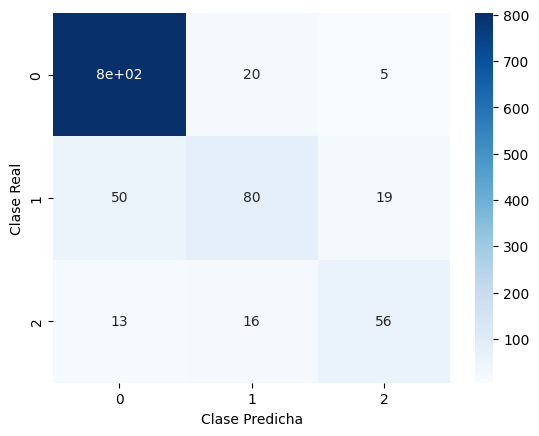

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()